In [7]:
import warnings

from da_od.config import class_names, sam_weights, test_img
from da_od.model import DepthAnythingEstimator, MiDaSEstimator, MonocularDepthEstimator, SegmentDetection

image_path = test_img / "DALLE.jpeg"
CLASS_NAME_PATH = class_names / "coco.names.txt"
CHECKPOINT_PATH = sam_weights / "sam_vit_h_4b8939.pth"

warnings.filterwarnings("ignore", message=".*")

[2024-03-07 17:58:35] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 17:58:35] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 17:58:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


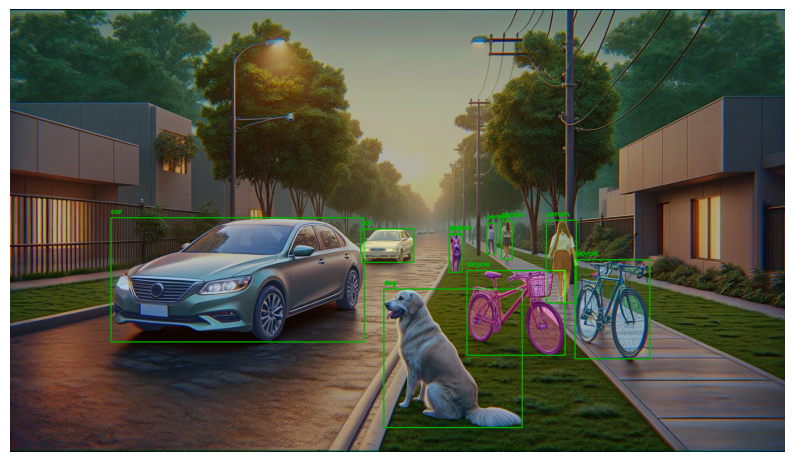

In [2]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(image_path)

In [3]:
DepthAnything_estimator = DepthAnythingEstimator(image_path, encoder="vits")
DepthAnything_colored, DepthAnything_raw = DepthAnything_estimator.process_image()

[2024-03-07 17:59:14] WARNING - attention.py - xFormers not available
[2024-03-07 17:59:14] WARNING - block.py - xFormers not available
[2024-03-07 17:59:14] INFO - vision_transformer.py - using MLP layer as FFN


In [4]:
MiDaS_estimator = MiDaSEstimator(image_path, model_type="DPT_Large")
MiDaS_colored, MiDaS_raw = MiDaS_estimator.process_image()

Using cache found in /Users/maryam/.cache/torch/hub/intel-isl_MiDaS_master


In [5]:
Monocular_estimator = MonocularDepthEstimator(image_path, model_name="mono_640x192")
Monocular_colored, Monocular_raw = Monocular_estimator.process_image()